In [803]:
import numpy as np
import matplotlib.pyplot as plt



Ejercicio 4.1

In [804]:
N = 1000000
a = 0
b = np.pi
x = np.random.uniform(a,b,N) #N es el número de muestras aleatorias que tomará

In [805]:
# Definir la función 
def func(x):
    return np.exp(-x) * np.sin(x)

In [806]:
# Calculo aleatorio de f(xi)
fxi = func(x)
fxi

array([0.0045285 , 0.18564852, 0.09738916, ..., 0.29465911, 0.193189  ,
       0.32161078])

In [807]:
#Integral 
def Int(fi, N):
    int = (b-a)*sum(fi)/N
    return int
int = Int (fxi, N)
int

0.5213612631288695

Como se oberva, al generar un x aleatorio el resultado de la integral varia en fucnion de este x, por lo cual existe un error porcentual en relacion al valor teorico de la integral, esto debido al numero de medidas

In [808]:
#Estblecemos el valor teorico de la integral
intTeo = 1/2 * (1+ np.exp(-np.pi))
intTeo

#Este valor no cambia, por lo cual se usa para calcular el error porcentual de un x aleatorio

0.5216069591318861

Error % =[(Valor Teórico - Valor Experimental) / Valor Teórico] × 100%

In [809]:
#calculo error porcentual
def error_porcentual(exp, teo):
    error = np.abs((exp-teo)/teo) *100
    return error

error = error_porcentual (int, intTeo)
error


0.047103666604739684

In [810]:
#Ahora calculamos el error porcentual en base a N

N_cantidad = [10,100,1000,10000,100000,1000000]#Establecemos un cantidad de N 

ErrorNi = [] # errores porcentuales para cada cantidad de N
Cota_sup = [] #1/Raiz(N) para cada cantidad de N

for Ni in N_cantidad:
    a = 0
    b = np.pi
    x = np.random.uniform(a, b, Ni)
    
    # Calcular los valores de la función en las muestras
    fNi = func(x)
    
    # Calcular la integral utilizando el método de Monte Carlo
    Iexp = Int(fNi, Ni)
    
    # Calcular el error porcentual
    ErrorPortNi = error_porcentual(Iexp,intTeo )
    
    ErrorNi.append(ErrorPortNi)

    #Calcular 1/Raiz(N)
    cot = (1 / np.sqrt(N))
    Cota_sup.append(cot)


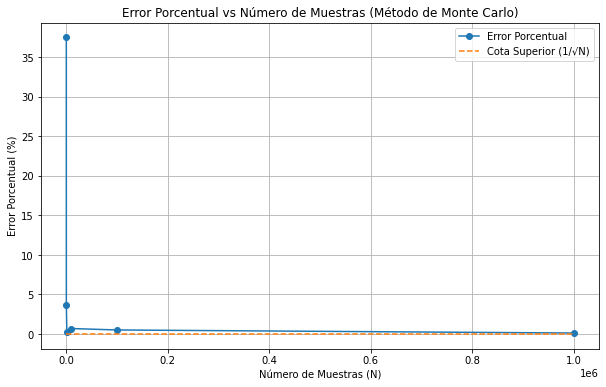

In [811]:
# Graficar el error porcentual en función de N
plt.figure(figsize=(10, 6))
plt.plot(N_cantidad, ErrorNi, marker='o' , label='Error Porcentual')
plt.plot(N_cantidad, Cota_sup, linestyle='--', label='Cota Superior (1/√N)')
plt.xlabel('Número de Muestras (N)')
plt.ylabel('Error Porcentual (%)')
plt.title('Error Porcentual vs Número de Muestras (Método de Monte Carlo)')
plt.grid(True)
plt.legend()
plt.show()

Ejercicio 4.3

In [812]:
#Establecer el rango de la integral (Radio de la esfera (Ω))
R = 1

#Rstablecemos N puntos aleatorios
N = np.random.randint(1000, 100000)
N

36720

In [813]:
# Generar coordenadas x, y, y z aleatorias en base a R y N
x = np.random.uniform(-R,R,N)
y = np.random.uniform(-R,R,N)
z = np.random.uniform(-R,R,N)

In [814]:
# Calcular la integral aproximada

suma = 0.0
for i in range(N):
    if x[i]**2 + y[i]**2 + z[i]**2 < R**2:
        int = np.sin(x[i]**2 + y[i]**2 + z[i]**2) * np.exp(x[i]**2 + y[i]**2 + z[i]**2)
        suma += int

I = (2*R)**3*suma/N 
I

4.735727170866607

In [815]:
print("Resultado aproximado de la integral:", I)

Resultado aproximado de la integral: 4.735727170866607
